In [4]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [5]:
df = pd.read_csv('vowel.dat',header=None,sep = ',')
train = df[df[0] == 0]
test = df[df[0] == 1]

X = train.iloc[:,3:13].to_numpy()
y = train.iloc[:,-1:].to_numpy().reshape(528)
testX = test.iloc[:,3:13].to_numpy()
testy = test.iloc[:,-1:].to_numpy().reshape(462)

numbers = [*range(11)] # number 2 > number 1
number_of_classification = 11


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

test_list_y =testy.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(test_list_y)) if test_list_y[i] == digit]
    digits_indexes.extend(li)

test_x_inputs =[tuple(c) for c in testX[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in testy[digits_indexes].reshape(462,1).tolist()]

In [23]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

def get_winner(class1, class2):
    
    numbers = [*range(11)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 9)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-vowel2")
    [stats, winner] = run(config_path)
    
    return winner

In [24]:
winner_list = []

for class1 in range(0,10):
    for class2 in range(class1+1, 11):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:48
Class2:1 #class2:48

 ****** Running generation 0 ****** 

Population's average fitness: 0.50557 stdev: 0.07131
Best fitness: 0.76042 - size: (2, 2) - species 3 - id 11
Average adjusted fitness: 0.215
Mean genetic distance 2.613, standard deviation 0.520
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.223 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52297 stdev: 0.08495
Best fitness: 0.76042 - size: (2, 3) - species 11 - id 348
Average adjusted fitness: 0.273
Mean genetic distance 2.674, standard deviation 0.553
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.243 sec (0.233 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53571 stdev: 0.08024
Best fitness: 0.78125 - size: (4, 6) - species 11 - id 493
Average adjusted fitness: 0.184
Mean genetic distance 2.692, standard deviation 0.571
Population of 200 members in 14 species
Total extinctions: 

Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.566 sec (0.495 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66802 stdev: 0.19159
Best fitness: 0.95833 - size: (4, 7) - species 23 - id 1271
Average adjusted fitness: 0.546
Mean genetic distance 3.083, standard deviation 0.514
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 1.177 sec (0.580 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64836 stdev: 0.19883
Best fitness: 0.95833 - size: (4, 7) - species 1 - id 1271
Average adjusted fitness: 0.563
Mean genetic distance 3.075, standard deviation 0.517
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 0.717 sec (0.596 average)
Class1:0 #class1:48
Class2:4 #class2:48

 ****** Running generation 0 ****** 

Population's average fitness: 0.49792 stdev: 0.15177
Best fitness: 0.97917 - size: (2, 2) - species 3 - id 146
Average adjusted fitnes

Mean genetic distance 2.926, standard deviation 0.536
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 0.328 sec (0.279 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63451 stdev: 0.19559
Best fitness: 0.95833 - size: (4, 6) - species 12 - id 643
Average adjusted fitness: 0.546
Mean genetic distance 2.845, standard deviation 0.570
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.329 sec (0.287 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65729 stdev: 0.19814
Best fitness: 0.95833 - size: (4, 6) - species 12 - id 643
Average adjusted fitness: 0.536
Mean genetic distance 2.896, standard deviation 0.579
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 0.345 sec (0.295 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67765 stdev: 0.20027
Best fitness: 0.95833 - size: (3, 3) - species 2 - id 718
Average ad

Total extinctions: 0
Generation time: 0.319 sec (0.264 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62153 stdev: 0.17273
Best fitness: 0.93750 - size: (4, 6) - species 6 - id 813
Average adjusted fitness: 0.491
Mean genetic distance 2.866, standard deviation 0.469
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.337 sec (0.279 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60686 stdev: 0.16746
Best fitness: 0.97917 - size: (5, 8) - species 13 - id 996
Average adjusted fitness: 0.503
Mean genetic distance 2.876, standard deviation 0.486
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 0.361 sec (0.293 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61855 stdev: 0.18705
Best fitness: 0.97917 - size: (5, 8) - species 13 - id 996
Average adjusted fitness: 0.536
Mean genetic distance 2.918, standard deviation 0.483
Population of 199 

Total extinctions: 0
Generation time: 0.216 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53427 stdev: 0.11101
Best fitness: 0.91667 - size: (3, 4) - species 2 - id 370
Average adjusted fitness: 0.381
Mean genetic distance 2.552, standard deviation 0.464
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 0.298 sec (0.257 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54631 stdev: 0.14090
Best fitness: 0.91667 - size: (3, 4) - species 2 - id 370
Average adjusted fitness: 0.439
Mean genetic distance 2.507, standard deviation 0.509
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 0.265 sec (0.260 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57802 stdev: 0.12474
Best fitness: 0.91667 - size: (3, 4) - species 2 - id 370
Average adjusted fitness: 0.476
Mean genetic distance 2.570, standard deviation 0.540
Population of 198 members in 11 spec

Average adjusted fitness: 0.432
Mean genetic distance 3.071, standard deviation 0.517
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 0.533 sec (0.356 average)
Class1:1 #class1:48
Class2:6 #class2:48

 ****** Running generation 0 ****** 

Population's average fitness: 0.49776 stdev: 0.12867
Best fitness: 0.88542 - size: (2, 2) - species 1 - id 3
Average adjusted fitness: 0.414
Mean genetic distance 2.678, standard deviation 0.526
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 0.214 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57648 stdev: 0.15702
Best fitness: 0.93750 - size: (2, 3) - species 11 - id 271
Average adjusted fitness: 0.407
Mean genetic distance 2.768, standard deviation 0.560
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.250 sec (0.232 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62698 stdev: 0.17614
Best fitness: 0

Best fitness: 0.89583 - size: (2, 5) - species 7 - id 911
Average adjusted fitness: 0.313
Mean genetic distance 2.903, standard deviation 0.550
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 0.323 sec (0.274 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57507 stdev: 0.12408
Best fitness: 0.89583 - size: (2, 5) - species 7 - id 911
Average adjusted fitness: 0.338
Mean genetic distance 2.938, standard deviation 0.564
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 0.341 sec (0.285 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58019 stdev: 0.13590
Best fitness: 0.89583 - size: (2, 5) - species 2 - id 911
Average adjusted fitness: 0.361
Mean genetic distance 2.989, standard deviation 0.552
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.343 sec (0.293 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.5

Class2:7 #class2:48

 ****** Running generation 0 ****** 

Population's average fitness: 0.49380 stdev: 0.13812
Best fitness: 0.87500 - size: (2, 2) - species 1 - id 185
Average adjusted fitness: 0.478
Mean genetic distance 2.559, standard deviation 0.466
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 0.214 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57354 stdev: 0.15048
Best fitness: 0.97917 - size: (3, 3) - species 6 - id 240
Average adjusted fitness: 0.346
Mean genetic distance 2.662, standard deviation 0.488
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 0.239 sec (0.227 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59727 stdev: 0.17007
Best fitness: 0.98958 - size: (3, 3) - species 1 - id 467
Average adjusted fitness: 0.538
Mean genetic distance 2.670, standard deviation 0.540
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 0.264

Total extinctions: 0
Generation time: 0.310 sec (0.257 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56513 stdev: 0.11135
Best fitness: 0.90625 - size: (4, 8) - species 6 - id 993
Average adjusted fitness: 0.407
Mean genetic distance 2.509, standard deviation 0.530
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 0.307 sec (0.266 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57658 stdev: 0.11670
Best fitness: 0.90625 - size: (4, 8) - species 7 - id 993
Average adjusted fitness: 0.342
Mean genetic distance 2.672, standard deviation 0.550
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.305 sec (0.271 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56938 stdev: 0.10986
Best fitness: 0.90625 - size: (4, 8) - species 6 - id 993
Average adjusted fitness: 0.215
Mean genetic distance 2.746, standard deviation 0.537
Population of 200 me

Best fitness: 0.87500 - size: (3, 5) - species 4 - id 714
Average adjusted fitness: 0.364
Mean genetic distance 2.838, standard deviation 0.484
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 0.318 sec (0.266 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58817 stdev: 0.11729
Best fitness: 0.87500 - size: (3, 5) - species 4 - id 714
Average adjusted fitness: 0.322
Mean genetic distance 2.921, standard deviation 0.524
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 0.399 sec (0.288 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57923 stdev: 0.12560
Best fitness: 0.87500 - size: (3, 5) - species 4 - id 714
Average adjusted fitness: 0.363
Mean genetic distance 2.967, standard deviation 0.532
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.398 sec (0.304 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.5

Population of 201 members in 25 species
Total extinctions: 0
Generation time: 0.351 sec (0.300 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58655 stdev: 0.11881
Best fitness: 0.92708 - size: (4, 6) - species 6 - id 1089
Average adjusted fitness: 0.215
Mean genetic distance 3.001, standard deviation 0.521
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 0.363 sec (0.308 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59301 stdev: 0.13278
Best fitness: 0.92708 - size: (4, 6) - species 6 - id 1089
Average adjusted fitness: 0.298
Mean genetic distance 3.042, standard deviation 0.527
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 0.376 sec (0.316 average)
Class1:3 #class1:48
Class2:10 #class2:48

 ****** Running generation 0 ****** 

Population's average fitness: 0.49708 stdev: 0.05528
Best fitness: 0.75000 - size: (2, 2) - species 1 - id 88
Average adjusted fitness

Generation time: 0.294 sec (0.257 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55193 stdev: 0.07123
Best fitness: 0.72917 - size: (2, 3) - species 9 - id 720
Average adjusted fitness: 0.174
Mean genetic distance 2.759, standard deviation 0.540
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 0.330 sec (0.269 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54849 stdev: 0.07030
Best fitness: 0.72917 - size: (2, 3) - species 9 - id 720
Average adjusted fitness: 0.192
Mean genetic distance 2.746, standard deviation 0.552
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 0.356 sec (0.282 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55095 stdev: 0.07527
Best fitness: 0.72917 - size: (2, 3) - species 9 - id 720
Average adjusted fitness: 0.204
Mean genetic distance 2.775, standard deviation 0.556
Population of 201 members in 18 species
T

Total extinctions: 0
Generation time: 0.267 sec (0.241 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62267 stdev: 0.14823
Best fitness: 0.95833 - size: (3, 5) - species 1 - id 702
Average adjusted fitness: 0.426
Mean genetic distance 2.771, standard deviation 0.550
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 0.302 sec (0.256 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63800 stdev: 0.15994
Best fitness: 0.95833 - size: (3, 5) - species 1 - id 702
Average adjusted fitness: 0.420
Mean genetic distance 2.791, standard deviation 0.566
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 0.323 sec (0.269 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63283 stdev: 0.16495
Best fitness: 0.95833 - size: (4, 5) - species 11 - id 930
Average adjusted fitness: 0.394
Mean genetic distance 2.916, standard deviation 0.551
Population of 200 m


 ****** Running generation 2 ****** 

Population's average fitness: 0.54376 stdev: 0.10175
Best fitness: 0.86458 - size: (3, 4) - species 4 - id 533
Average adjusted fitness: 0.243
Mean genetic distance 2.553, standard deviation 0.545
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 0.266 sec (0.237 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55115 stdev: 0.11861
Best fitness: 0.95833 - size: (2, 2) - species 10 - id 674
Average adjusted fitness: 0.329
Mean genetic distance 2.763, standard deviation 0.609
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.282 sec (0.249 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55104 stdev: 0.11896
Best fitness: 0.95833 - size: (2, 2) - species 10 - id 674
Average adjusted fitness: 0.415
Mean genetic distance 2.802, standard deviation 0.634
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 0.28

Class1:5 #class1:48
Class2:10 #class2:48

 ****** Running generation 0 ****** 

Population's average fitness: 0.49583 stdev: 0.05669
Best fitness: 0.67708 - size: (2, 2) - species 7 - id 137
Average adjusted fitness: 0.266
Mean genetic distance 2.574, standard deviation 0.471
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 0.408 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51906 stdev: 0.06401
Best fitness: 0.73958 - size: (2, 3) - species 1 - id 227
Average adjusted fitness: 0.182
Mean genetic distance 2.630, standard deviation 0.500
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 0.437 sec (0.422 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52995 stdev: 0.06331
Best fitness: 0.73958 - size: (2, 3) - species 6 - id 227
Average adjusted fitness: 0.192
Mean genetic distance 2.628, standard deviation 0.520
Population of 200 members in 15 species
Total extinctions: 


 ****** Running generation 8 ****** 

Population's average fitness: 0.60345 stdev: 0.13747
Best fitness: 0.87500 - size: (4, 5) - species 7 - id 1352
Average adjusted fitness: 0.275
Mean genetic distance 3.112, standard deviation 0.491
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 0.396 sec (0.300 average)
Class1:6 #class1:48
Class2:9 #class2:48

 ****** Running generation 0 ****** 

Population's average fitness: 0.49083 stdev: 0.08545
Best fitness: 0.88542 - size: (2, 2) - species 1 - id 191
Average adjusted fitness: 0.299
Mean genetic distance 2.621, standard deviation 0.497
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 0.242 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52135 stdev: 0.07559
Best fitness: 0.88542 - size: (2, 2) - species 1 - id 191
Average adjusted fitness: 0.253
Mean genetic distance 2.675, standard deviation 0.480
Population of 200 members in 13 species
Total extinctions: 

Mean genetic distance 3.071, standard deviation 0.559
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 0.353 sec (0.302 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58670 stdev: 0.11280
Best fitness: 0.81250 - size: (5, 9) - species 19 - id 1175
Average adjusted fitness: 0.278
Mean genetic distance 3.074, standard deviation 0.553
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 0.384 sec (0.312 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57036 stdev: 0.11552
Best fitness: 0.83333 - size: (4, 6) - species 7 - id 1462
Average adjusted fitness: 0.382
Mean genetic distance 3.116, standard deviation 0.531
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 0.407 sec (0.322 average)
Class1:7 #class1:48
Class2:9 #class2:48

 ****** Running generation 0 ****** 

Population's average fitness: 0.50542 stdev: 0.08838
Best fitness: 0.80208 - siz

Mean genetic distance 2.891, standard deviation 0.547
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 0.363 sec (0.314 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53787 stdev: 0.07330
Best fitness: 0.72917 - size: (4, 6) - species 1 - id 860
Average adjusted fitness: 0.182
Mean genetic distance 2.973, standard deviation 0.560
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 0.408 sec (0.330 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54009 stdev: 0.07642
Best fitness: 0.73958 - size: (6, 8) - species 9 - id 1227
Average adjusted fitness: 0.193
Mean genetic distance 2.995, standard deviation 0.528
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 0.455 sec (0.348 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53997 stdev: 0.07566
Best fitness: 0.73958 - size: (6, 8) - species 7 - id 1227
Average ad

In [25]:
classes = []
for class1 in range(0,10):
    for class2 in range(class1+1, 11):
        classes.append([class1, class2])
        
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-vowel2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [26]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(11)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
   
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [32]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(462):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0,0]
    for i in range(55):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [33]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [34]:
np.sum(list_P == testy)/462

0.39826839826839827

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[35  2  1  0  0  0  0  0  0  0  0]
 [ 2 13  1  0  0  0  0  0  0  1  0]
 [ 5 19 17  0  0  0  0  0  0  4  1]
 [ 0  0  8 14  3  2  1  0  0  0  0]
 [ 0  0  0  6  6  6  7  1  0  0  0]
 [ 0  0 10 13 21 23 12  0  0  0 11]
 [ 0  0  2  0 10  1 15  1  2  0  2]
 [ 0  0  0  0  0  0  0 16  1  2  0]
 [ 0  1  2  0  0  3  3 13  9  8 15]
 [ 0  6  0  0  0  0  2 11 30 27  4]
 [ 0  1  1  9  2  7  2  0  0  0  9]]


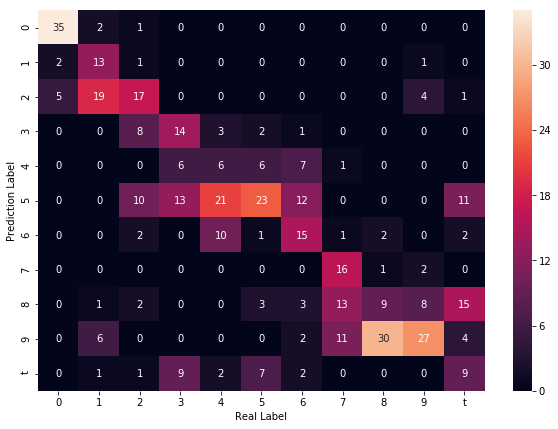

In [36]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789t"],
                  columns = [i for i in "0123456789t"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [ ]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [ ]:
np.sum(list_P == digits.target[:1617])/1617

In [ ]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)